In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download iamsandeepprasad/vehicle-data-set
! unzip vehicle-data-set.zip

In [ ]:
import matplotlib.pyplot as plt  # plotting library
import scipy                     # scientific computnig and technical computing
import cv2                       # working with, mainly resizing, images
import numpy as np               # dealing with arrays
import glob                      # return a possibly-empty list of path names that match pathname
import os                        # dealing with directories
import pandas as pd              # providing data structures and data analysis tools
import tensorflow as tf
import itertools
import random
from random import shuffle       # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm            # a nice pretty percentage bar for tasks. Thanks to viewer Daniel Bühler for this suggestion
from PIL import Image
from scipy import ndimage
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
%matplotlib inline
np.random.seed(1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
train_dir = 'cardataset/train'
test_dir = 'cardataset/test'

In [ ]:
os.listdir(train_dir)

['Taxi',
 'Caterpillar',
 'Tank',
 'Snowmobile',
 'Bicycle',
 'Car',
 'Cart',
 'Segway',
 'Truck',
 'Bus',
 'Barge',
 'Helicopter',
 'Motorcycle',
 'Van',
 'Ambulance',
 'Limousine',
 'Boat']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found 11472 images belonging to 7 classes.
Found 3084 images belonging to 7 classes.


Loaded model from disk


<ipython-input-7-c00e7256fbcd>:87: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
89/89 [==============================] - 600s 6s/step - loss: 1.2307 - tf.math.truediv_loss: 0.6022 - aux1_loss: 0.3343 - aux2_loss: 0.2941 - tf.math.truediv_acc: 0.8830 - aux1_acc: 0.8835 - aux2_acc: 0.8984 - val_loss: 1.3161 - val_tf.math.truediv_loss: 0.6264 - val_aux1_loss: 0.3689 - val_aux2_loss: 0.3208 - val_tf.math.truediv_acc: 0.8828 - val_aux1_acc: 0.8711 - val_aux2_acc: 0.8883
Epoch 2/10
89/89 [==============================] - 498s 6s/step - loss: 1.2096 - tf.math.truediv_loss: 0.5942 - aux1_loss: 0.3228 - aux2_loss: 0.2926 - tf.math.truediv_acc: 0.8871 - aux1_acc: 0.8838 - aux2_acc: 0.8999 - val_loss: 1.2283 - val_tf.math.truediv_loss: 0.5895 - val_aux1_loss: 0.3329 - val_aux2_loss: 0.3058 - val_tf.math.truediv_acc: 0.8965 - val_aux1_acc: 0.8851 - val_aux2_acc: 0.8926
Epoch 3/10
89/89 [==============================] - 505s 6s/step - loss: 1.2083 - tf.math.truediv_loss: 0.5938 - aux1_loss: 0.3244 - aux2_loss: 0.2901 - tf.math.truediv_acc: 0.8859 - aux1_acc: 0.887

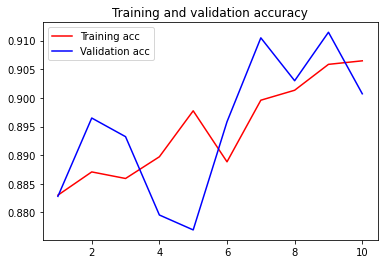

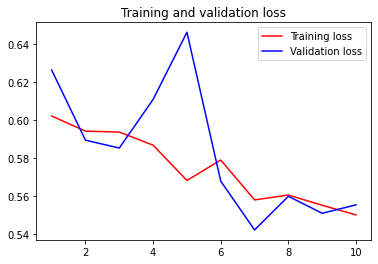

25/25 [==============================] - 80s 3s/step - loss: 3.6326 - tf.math.truediv_loss: 1.3362 - aux1_loss: 1.1107 - aux2_loss: 1.1857 - tf.math.truediv_acc: 0.7085 - aux1_acc: 0.7309 - aux2_acc: 0.7299
Saved model to disk


In [ ]:
!sudo pip install h5py

LR = 1e-3
height=224
width=224
channels=3
seed=1337
batch_size = 128
num_classes = 7
epochs = 10
data_augmentation = True
num_predictions = 20
classes = ['Ambulance', 'Bicycle', 'Bus', 'Car', 'Taxi', 'Truck', 'Van']

# Training generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=seed,
                                                    shuffle=True,
                                                    class_mode='categorical', classes = classes)

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(height,width),
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  shuffle=True,
                                                  class_mode='categorical', classes = classes)

train_num = train_generator.samples
validation_num = validation_generator.samples


# create model
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
# print(os.listdir("../input/flowers/flowers"))

from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os
# define parameters
CLASS_NUM = 7
BATCH_SIZE = 128
EPOCH_STEPS = int(4323/BATCH_SIZE)
IMAGE_SHAPE = (224, 224, 3)

# load json and create model
json_file = open('model(1).json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model(1).h5")
print("Loaded model from disk")

optimizer = Adam(lr=2 * 1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# optimizer = SGD(lr=1 * 1e-1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
#model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])




history = model.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              verbose = 1
                             )



acc = history.history['tf.math.truediv_acc']
val_acc = history.history['val_tf.math.truediv_acc']
loss = history.history['tf.math.truediv_loss']
val_loss = history.history['val_tf.math.truediv_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()


score = model.evaluate(validation_generator)



# serialize model to JSON
model_json = model.to_json()
with open("model(1).json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model(1).h5")
print("Saved model to disk")